In [292]:
import numpy as np
import sep


This line imports our numpy and sep libraries so that we can use them

In [293]:
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import make_lupton_rgb


%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

this further imports libraries, formats them for jupyter notebook, and sets the parameters for the figure size

In [294]:
data = get_pkg_data_filename("C:/Users/jnben/Downloads/Hubble2/image2.fits")

This defines our hubble .fits file as data

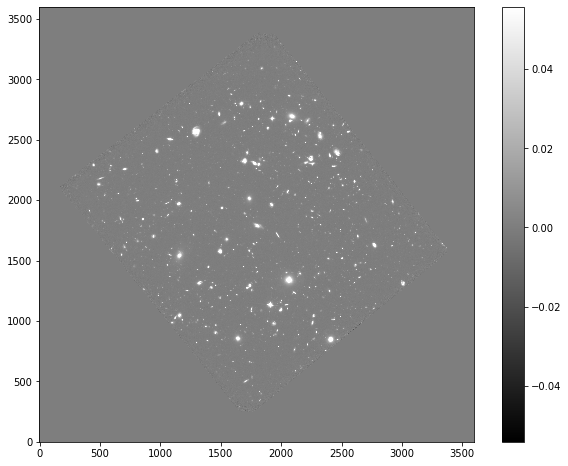

In [295]:
imagedata = astropy.io.fits.getdata(data,ext=0)
fig1 = plt.figure()

m, s = np.mean(imagedata), np.std(imagedata)
plt.imshow(imagedata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
fig1.savefig ("C:/Users/jnben/Downloads/Hubble2/figure1.png")

here we bring in the .fits file which we have alrady defined, we format on a scale and add a colorbar, as well as save it as a .png file

In [296]:
imagedata = imagedata.byteswap().newbyteorder()

In [297]:
bkg = sep.Background(imagedata)

here we measure the background of the image

In [298]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


here we get a global mean and noise of the background

In [299]:
bkg_image = bkg.back()

we evaluate the background as a 2-d array

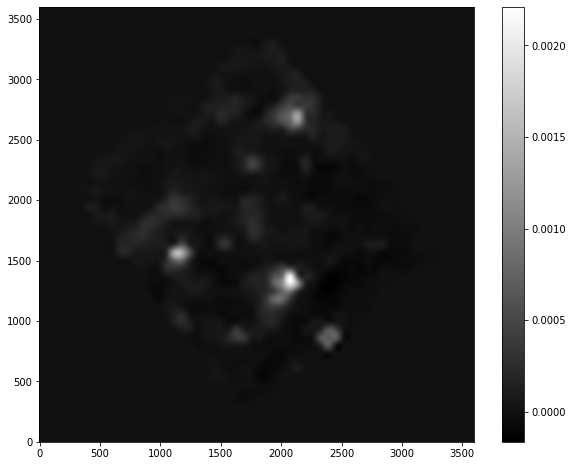

In [300]:
fig2 = plt.figure()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

fig2.savefig("C:/Users/jnben/Downloads/Hubble2/figure2.png")

this is the background of the image printed

In [301]:
bkg_rms = bkg.rms()

we evaluate the background noise as a 2-d array

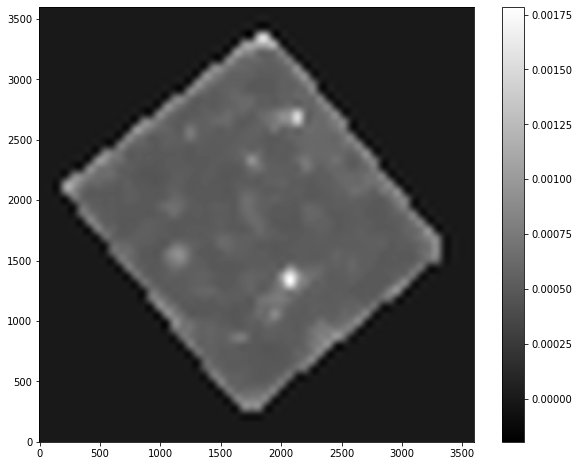

In [302]:
fig3 = plt.figure()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
fig3.savefig("C:/Users/jnben/Downloads/Hubble2/figure3.png")

we take what is left as the background noise, this is printed for us to see and save it as a png

In [303]:
data_sub = imagedata-bkg
objects = sep.extract(data_sub, 70, err=bkg.globalrms)

now we subtract the background of the image as well as chnage the inclusion to make the image more accurate

In [304]:
print(len(objects)) 

358


now we print the amount of objects detected in the image

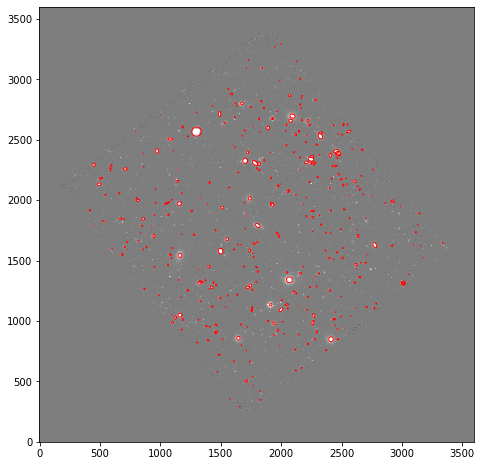

In [305]:
from matplotlib.patches import Ellipse

fig4, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
  
fig4.savefig ('C:/Users/jnben/Downloads/Hubble2/figure4.png')

now we create small markers for these objects so we can see that it is working properly and save it as a png

In [306]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

this shows the available feilds

In [307]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

now we perform a circular aperture phtomerty with a 3 pixel radius at the locations of the objects

In [308]:
fluxes = []
for i in range (len (objects.dtype.names)):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
    fluxes.append(flux[i])

object 0: flux = 1.147720 +/- 1.071321
object 1: flux = 1.130296 +/- 1.063158
object 2: flux = 0.836182 +/- 0.914434
object 3: flux = 1.249567 +/- 1.117844
object 4: flux = 0.966279 +/- 0.982999
object 5: flux = 3.209709 +/- 1.791569
object 6: flux = 1.059763 +/- 1.029452
object 7: flux = 1.423296 +/- 1.193023
object 8: flux = 2.247044 +/- 1.499017
object 9: flux = 1.215741 +/- 1.102610
object 10: flux = 8.205466 +/- 2.864520
object 11: flux = 1.309020 +/- 1.144128
object 12: flux = 1.458893 +/- 1.207850
object 13: flux = 1.025271 +/- 1.012561
object 14: flux = 1.922237 +/- 1.386451
object 15: flux = 1.485488 +/- 1.218809
object 16: flux = 1.044343 +/- 1.021935
object 17: flux = 1.415897 +/- 1.189918
object 18: flux = 2.071193 +/- 1.439167
object 19: flux = 2.311409 +/- 1.520335
object 20: flux = 3.370027 +/- 1.835766
object 21: flux = 1.125797 +/- 1.061040
object 22: flux = 1.317227 +/- 1.147709
object 23: flux = 3.316275 +/- 1.821067
object 24: flux = 1.107686 +/- 1.052471
object 25:

we are now provided with the values of the objects which we are analyzing

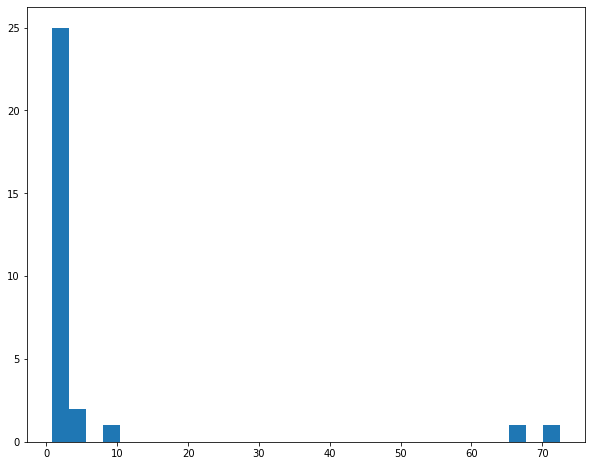

In [309]:
n,bins,patches=plt.hist(fluxes,len (objects.dtype.names))
plt.show()


we create a histogram with this data 

In [310]:
mean = np.mean(fluxes) 
print(mean)

6.306991873686662


we calculate the mean of our datadet

In [311]:
std = np.std(fluxes)
print(std)

16.843568295074785


we calculate the standard deviation of the dataset

In [312]:
median = np.median(fluxes)
print(median)

1.39643651612103


we calculate the median of our dataset

In [313]:
print (np.max(fluxes))


72.4401385307312


WE CALCULATE THE OUTLIER OF THE DATA SET, WE SEE THIS IN THE LARGEST BRIGHTEST OBJECT, THE OUTLIER IS 3.929 STANDARD DEVIATIONS FROM THE MEAN

In [314]:
data2 =  get_pkg_data_filename("C:/Users/jnben/Downloads/Hubble2/image3.fits")

here we bring in the 2nd hubble .fits file

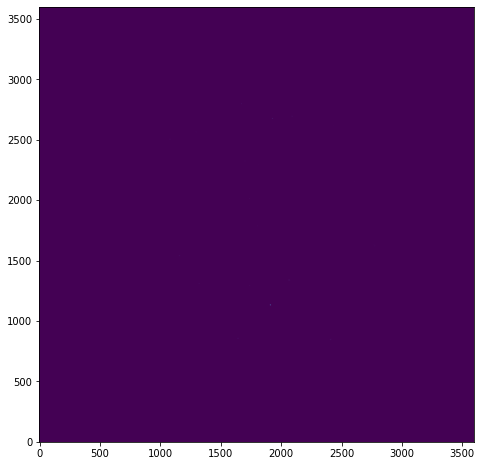

In [315]:
imagedata2 = astropy.io.fits.getdata(data2,ext=0)
fig5 = plt.figure()
m, s = np.mean(imagedata2), np.std(imagedata2)
plt.imshow(imagedata2, origin='lower')
fig5.savefig ("C:/Users/jnben/Downloads/Hubble2/figure5.png")

the purpose of this was to isolate this layer to a single color so they we are able to overlap them in order to create a full rgb image

In [316]:
data3 =  get_pkg_data_filename("C:/Users/jnben/Downloads/Hubble2/image4.fits")

we bring in the 3rd hubble .fits file

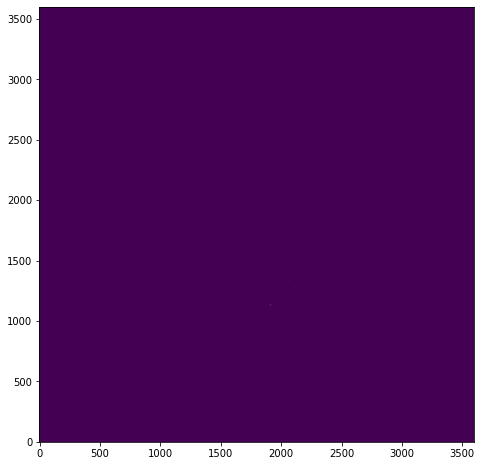

In [317]:
imagedata3 = astropy.io.fits.getdata(data3,ext=0)
fig6 = plt.figure()
plt.imshow(imagedata3, origin='lower')
fig6.savefig ("C:/Users/jnben/Downloads/Hubble2/figure6.png")

we once again try to isolate this to a single color

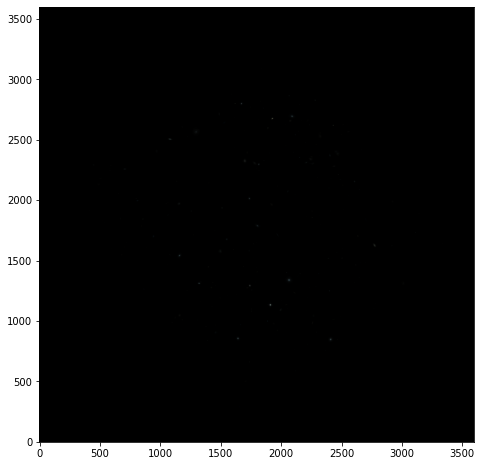

In [318]:
figure1 = astropy.io.fits.open(data)[0].data
figure2 = astropy.io.fits.open(data2)[0].data
figure3 = astropy.io.fits.open(data3)[0].data
rgb_default = make_lupton_rgb(figure1, figure2, figure3, filename="test.png") 
plt.imshow(rgb_default, origin='lower')

we isolate this third layer

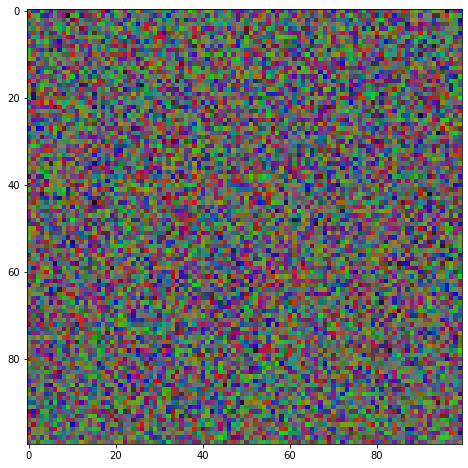

In [319]:
image_r = np.random.random((100,100))
image_g = np.random.random((100,100))
image_b = np.random.random((100,100))
image = make_lupton_rgb(image_r, image_g, image_b, stretch=0.5)
plt.imshow(image)

we combine these images to reveal a full rgb image